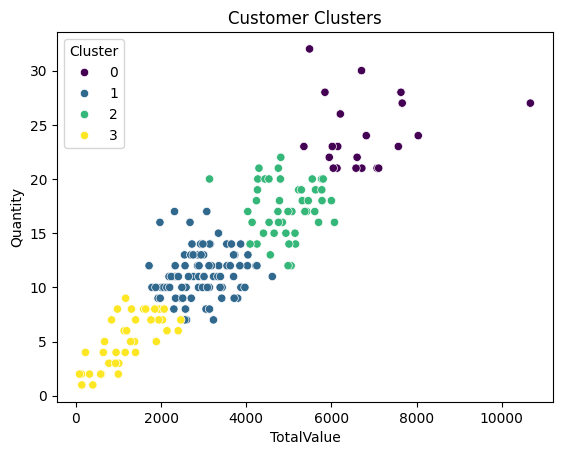

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Load datasets
transactions = pd.read_csv('../data/Transactions.csv')
customers = pd.read_csv('../data/Customers.csv')

# Merge datasets
customer_profile = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum', 'Quantity': 'sum'
}).reset_index()

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

# Evaluate clustering
db_index = davies_bouldin_score(scaled_data, customer_profile['Cluster'])
silhouette_avg = silhouette_score(scaled_data, customer_profile['Cluster'])

# Save the report as a PDF
def save_report(db_index, silhouette_avg, n_clusters=4):
    c = canvas.Canvas('Nikhil_Baghel_Clustering.pdf', pagesize=letter)
    
    c.setFont("Helvetica", 12)
    c.drawString(30, 750, "Clustering Results Report")
    c.drawString(30, 730, f"Number of clusters: {n_clusters}")
    c.drawString(30, 710, f"Davies-Bouldin Index: {db_index:.4f}")
    c.drawString(30, 690, f"Silhouette Score: {silhouette_avg:.4f}")
    
    c.showPage()
    c.save()

# Save the clustering report
save_report(db_index, silhouette_avg)

# Visualize clusters
sns.scatterplot(
    x='TotalValue', y='Quantity', hue='Cluster', data=customer_profile, palette='viridis'
)
plt.title("Customer Clusters")
plt.savefig('../images/customer_clusters.png')
plt.show()
